## Mitsiu Alejandro Carreño Sarabia - E23S-18014
Utiliza redes convolucionales para la detección de dígitos manuscritos.

Evalúa su desempeño

Compara con implementaciones anteriores

- Neurona
- Perceptrón multicapa

In [1]:
from tensorflow import keras

2023-10-25 01:28:43.051517: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-25 01:28:43.085860: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-25 01:28:43.085905: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-25 01:28:43.085921: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-25 01:28:43.091474: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-25 01:28:43.092730: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
import matplotlib.pyplot as plt
import numpy as np

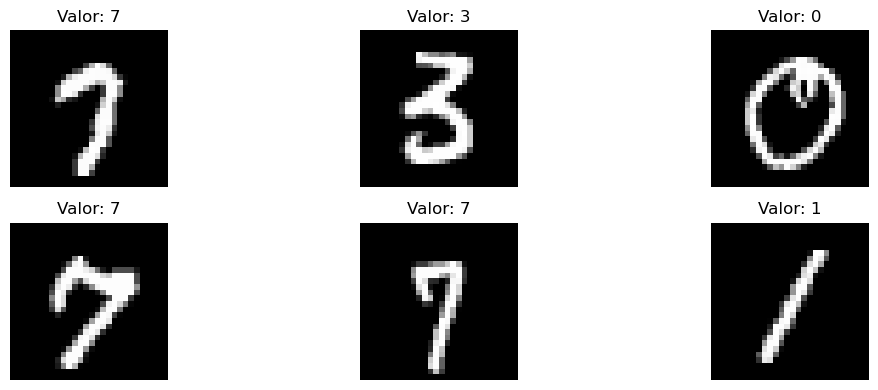

In [5]:
plt.figure(figsize=(12,4))
for i, idx in enumerate(np.random.choice(len(x_train), size=6, replace=False)):
    plt.subplot(2, 3, i+1)
    plt.imshow(x_train[idx], cmap="gray")
    plt.title(f"Valor: {y_train[idx]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [6]:
# Normalizar datos
x_train, x_test = x_train / 255.0, x_test / 255.0

In [7]:
# One-hot encode y values
y_test_cat = keras.utils.to_categorical(y_test)
y_train_cat = keras.utils.to_categorical(y_train)

In [8]:
def plotTrain(train_values, val_values, title):
    plt.title(title)
    plt.plot(train_values, label="train")
    plt.plot(val_values, label="validation")
    plt.legend()
    plt.show()

In [9]:
# Ajustar input de perceptron
# Cada imágen es un arreglo bidimensional de 28x28
# Cambiamos a que una imágen sea un arreglo de 1x784
x_train_mlp = x_train.reshape(
    x_train.shape[0],
    x_train.shape[1] * x_train.shape[2]
)
x_test_mlp = x_test.reshape(
    x_test.shape[0],
    x_test.shape[1] * x_test.shape[2]
)

## Perceptron

In [10]:
from sklearn.linear_model import Perceptron

pct = Perceptron(tol=1e-3)

pct.fit(x_train_mlp, y_train)
pct_acc = pct.score(x_test_mlp, y_test)

print(f"Precision test: {pct_acc * 100 :.2f}%")

Precision test: 88.05%


## Perceptron multicapa

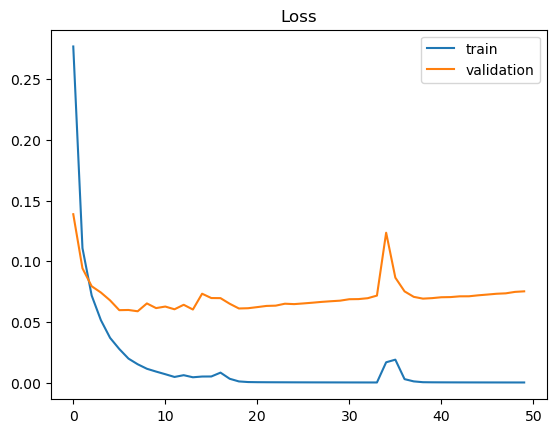

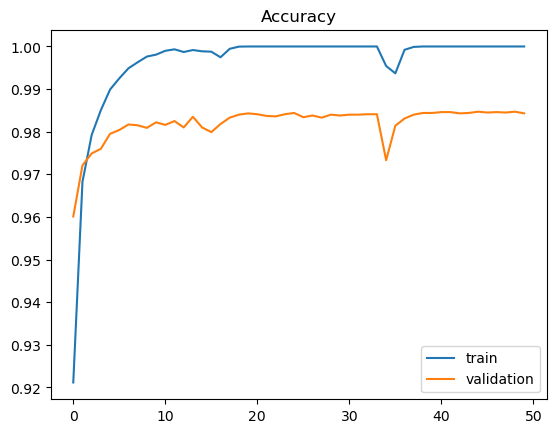

In [11]:
mlp = keras.models.Sequential()

mlp.add(keras.layers.Input(shape=(x_train_mlp.shape[1],)))

mlp.add(keras.layers.Dense(x_train_mlp.shape[1], activation="relu"))

mlp.add(keras.layers.Dense(y_train_cat.shape[1], activation="softmax"))

mlp.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

mlp_history = mlp.fit(x_train_mlp, y_train_cat, validation_data=(x_test_mlp, y_test_cat), epochs=50, batch_size=200, verbose=False)

plotTrain(mlp_history.history["loss"], mlp_history.history["val_loss"], "Loss")
plotTrain(mlp_history.history["accuracy"], mlp_history.history["val_accuracy"], "Accuracy")

In [12]:
mlp_loss, mlp_accuracy = mlp.evaluate(x_test_mlp, y_test_cat)

print(f"Perdida test: {mlp_loss:.4f}")
print(f"Precision test: {mlp_accuracy * 100 :.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.0752 - accuracy: 0.9843
Perdida test: 0.0752
Precision test: 98.43%


## Convolutional Neural Network

In [13]:
# Ajustar input de red neuronal convolucional
# Cada imágen es un arreglo bidimensional de 28x28
# Agregamos la cantidad de bandas de color, en este caso como es un imágen en escala de grises solo tenemos una
x_train_cnn = x_train.reshape(
    x_train.shape[0],
    x_train.shape[1], 
    x_train.shape[2],
    1
)
x_test_cnn = x_test.reshape(
    x_test.shape[0],
    x_test.shape[1], 
    x_test.shape[2],
    1
)

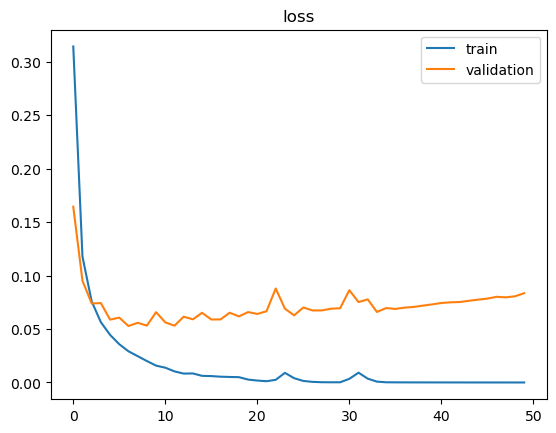

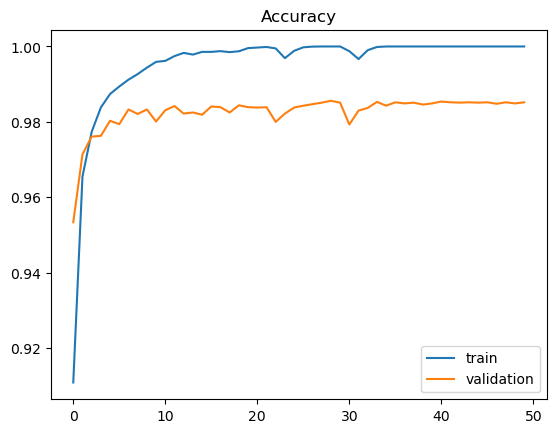

In [14]:
cnn = keras.models.Sequential()

cnn.add(keras.layers.Input(shape=x_train_cnn[0].shape))

cnn.add(
    keras.layers.Conv2D(
        32, 
        (2, 2),
        #input_shape=(, 28,28),
        activation="relu"
    )
)

cnn.add(
    keras.layers.MaxPooling2D(
        (2,2)
    )
)

cnn.add(keras.layers.Flatten())

cnn.add(keras.layers.Dense(100, activation="relu"))

cnn.add(keras.layers.Dense(y_train_cat.shape[1], activation="softmax"))

cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

cnn_history = cnn.fit(x_train_cnn, y_train_cat, validation_data=(x_test_cnn, y_test_cat), epochs=50, batch_size=200, verbose=False)

plotTrain(cnn_history.history["loss"], cnn_history.history["val_loss"], "loss")
plotTrain(cnn_history.history["accuracy"], cnn_history.history["val_accuracy"], "Accuracy")

In [15]:
cnn_loss, cnn_accuracy = cnn.evaluate(x_test_cnn, y_test_cat)

print(f"Perdida test: {cnn_loss:.4f}")
print(f"Precision test: {cnn_accuracy * 100 :.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.0835 - accuracy: 0.9852
Perdida test: 0.0835
Precision test: 98.52%


## Conclusiones
Creo que contrastar un mismo problema resuelto con tres estratégias distintas de búsqueda, realmente me ayuda a poner en perspectiva los pros y contras de cada una.          
Comenzando por el perceptrón, que implementé una solución muy básica, el resultado se obtiene muy rápido, pero el nivel de precisión es relativamente bajo (88%)           
Cuando implementé el perceptrón multicapa, a mi parecer es la estrategia que mejor se adapta a este problema en específico (un problema de mediana complejidad) debido a que su tiempo de procesamiento fue tangiblemente más rápido que la red convolucional y ofrece un nivel de precisión bastante decente (98.4)          
En cambio la red convolucional fue mucho más demandante tanto en requisitos de procesamiento como en tiempo, y ofrece una mejora marginal respecto al perceptrón multicapa (98.5), por lo que para este problema en específico, una red convolucional me parece un poco over-engineered.
